In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [2]:
# Pull Crime Data file
file_to_load = "2010-2019_Crime.csv"

# Read Crime Data File
crime_df = pd.read_csv(file_to_load)
# crime_df

In [3]:
# Pull Community file
comm_file = "Chicago_Communities.csv"

# Read Chicago Community File 
comm_df = pd.read_csv(comm_file)
comm_df
# # Rename Columns with spaces
comm_df.rename(columns={'City Area': 'City_Area'}, inplace =True)
# comm_df

In [4]:
# decade_crimes

grand_total = crime_df["Crimes"].sum()
violent_crimes = crime_df["Violent"].sum()
gun_crimes = crime_df["Gun_Violence"].sum()
robbery_crimes = crime_df["Robbery"].sum()
vandalism_crimes = crime_df["Vandalism"].sum()
fraud_crimes = crime_df["Fraud"].sum()
drug_crimes = crime_df["Drug_Abuse"].sum()
sex_crimes = crime_df["Sexual"].sum()

crime_count_data = {'Total Reported Crimes': [grand_total],
                    'Total Violent Crimes':[violent_crimes],
                    'Total Gun Violence Crimes': [gun_crimes],
                    'Total Robbery Crimes': [robbery_crimes],
                    'Total Vandalism Crimes':[vandalism_crimes],
                    'Total Fraudulent Crimes' : [fraud_crimes],
                    'Total Drug Crimes': [drug_crimes],
                    'Total Sex Crimes': [sex_crimes]}

decade_crimes_df = pd.DataFrame(crime_count_data)

# Export DataFrame to CSV
decade_crimes_df.to_csv('decade_crime_count.csv')

decade_crimes_df

# The crime types listed below account for more that 55% of Chicago crimes.  
# Other crimes include non-violent theft, burglary, criminal trespassing, liquor violations, gambling, etc.

,Total Reported Crimes,Total Violent Crimes,Total Gun Violence Crimes,Total Robbery Crimes,Total Vandalism Crimes,Total Fraudulent Crimes,Total Drug Crimes,Total Sex Crimes
0,2966918,727505,93501,114512,300925,113292,256968,36657


In [5]:
# Create DataFrame to calculate annual crimes per year
crime_type_df = crime_df.filter(['Year',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# GroupBy Year
group_year = crime_type_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(group_year["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(group_year["Gun_Violence"].sum())
gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(group_year["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(group_year["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(group_year["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(group_year["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(group_year["Sexual"].sum())
# sexual_crimes

In [6]:
# Merge Crime Calculations
merge_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
merge_table1

merge_table2 = pd.merge(merge_table1, robbery_crimes, on='Year')
merge_table2

merge_table3 = pd.merge(merge_table2, vandalism_crimes, on='Year')
merge_table3

merge_table4 = pd.merge(merge_table3, fraud_crimes, on='Year')
merge_table4

merge_table5 = pd.merge(merge_table4, drug_crimes, on='Year')
merge_table5

crime_type_totals = pd.merge(merge_table5, sexual_crimes, on='Year')
crime_type_totals = crime_type_totals.reset_index()
# crime_type_totals

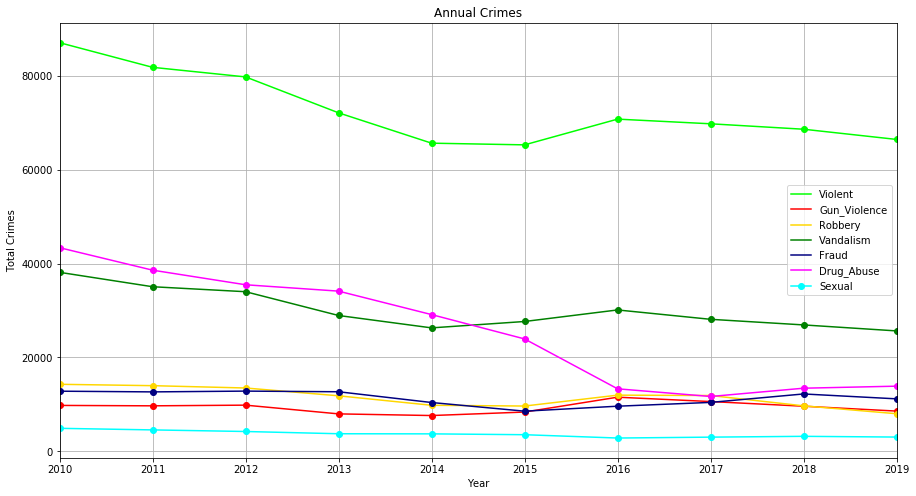

In [7]:
# Graph Crime Totals

ax = plt.gca()

crime_type_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('grand_total_annual_crimes.png')

plt.show()

In [8]:
# INPUT community name to create a modified line graph of annual community crimes
community = input("What part of Chicago do you want to look into? ")

What part of Chicago do you want to look into?  Austin


In [9]:
# Create a variable for city Areas and Neighborhoods
area = comm_df.loc[comm_df["Community"] == community]['City_Area']
# type(area)
area = area.values
area = area[0]
# area type was originally a series so ".values" was used to pull an individual value from that series

neighborhoods = comm_df.loc[comm_df["Community"]== community]['Neighborhood']
neighborhoods = neighborhoods.values
# Print neighborhoods without brackets and separated by commas
neighborhoods = (', '.join(neighborhoods))

# Provide the city area and list of neighborhoods in the input community
print(f"{community} is in the {area} area, which includes the following neighborhoods: {neighborhoods}")

Austin is in the West Side area, which includes the following neighborhoods: Galewood, The Island


In [10]:
# Create DataFrame to calculate annual crimes for input Community 
comm_crime_df = crime_df.filter(['Year',
                                 'Community',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# Use ".loc" to create a DataFrame adjusted based on the INPUT community
input_df = comm_crime_df.loc[comm_crime_df["Community"]== community]
input_df

# GroupBy Year
year_group = input_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(year_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(year_group["Robbery"].sum())
# robbery_crimes
# # Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(year_group["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(year_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(year_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(year_group["Sexual"].sum())
# sexual_crimes

In [11]:
# Merge Crime Calculation DataFrames
m_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
m_table1

m_table2 = pd.merge(m_table1, robbery_crimes, on='Year')
m_table2

m_table3 = pd.merge(m_table2, vandalism_crimes, on='Year')
m_table3

m_table4 = pd.merge(m_table3, fraud_crimes, on='Year')
m_table4

m_table5 = pd.merge(m_table4, drug_crimes, on='Year')
m_table5

# Final Community DataFrame
comm_crime_totals = pd.merge(m_table5, sexual_crimes, on='Year')
comm_crime_totals = comm_crime_totals.reset_index()
# comm_crime_totals

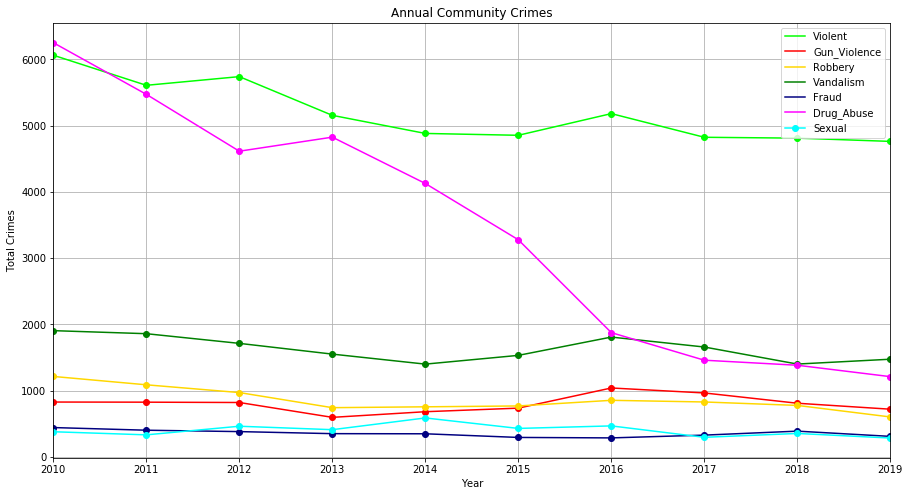

In [13]:
# Graph Crime Totals

ax = plt.gca()

comm_crime_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Community Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('annual_community_crimes.png')

plt.show()

In [13]:
# Annual Gun Violence: 
# Top 9 communities with over 3,400 Gun Violence Crimes between 2010-2019

# Filter Master DataFrame by Top 9 Communities
gun_violence_df = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]
# gun_violence_df

# Filter Relevant Columns
gun_violence_df = gun_violence_df.filter(["Year", "Community", "Gun_Violence"])
# gun_violence_df

# Group by Year and Community
comm_year_group = gun_violence_df.groupby(["Year","Community"])

# Calculate Gun Violence per Year by Community
gun_violence_df = pd.DataFrame(comm_year_group["Gun_Violence"].sum())
# gun_violence_df

# Pivot Table to reformat the DataFrame
gun_violence_df = gun_violence_df.pivot_table(index= 'Year', columns = 'Community', values = 'Gun_Violence')
gun_violence_df= gun_violence_df.reset_index()
# gun_violence_df

# Rename Columns with spaces
gun_violence_df.rename(columns={'North Lawndale': 'North_Lawndale',
                                'South Shore': 'South_Shore',
                                'West Englewood': 'West_Englewood',
                                'Auburn Gresham': 'Auburn_Gresham',
                                'Greater Grand Crossing': 'Greater_Grand_Crossing',
                                'Humboldt Park': 'Humboldt_Park'}, inplace =True)
# gun_violence_df


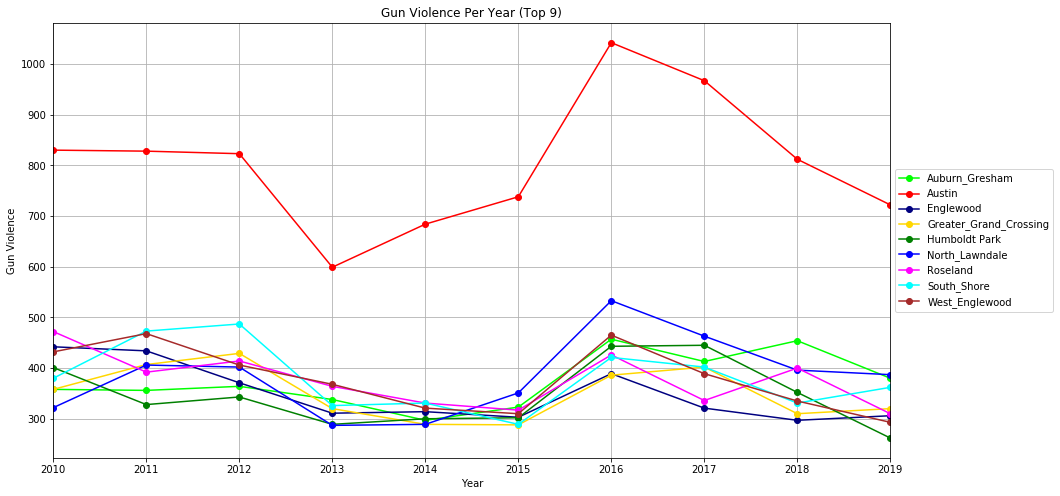

In [14]:
# Build Gun Violence Line Graph

# gca stands for 'get current axis'
ax = plt.gca()

gun_violence_df.plot(kind='line',x='Year',y='Auburn_Gresham',marker ='o',color='lime',figsize=(15,8),ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Austin', marker ='o',color='red', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Englewood',marker ='o', color = 'navy', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Greater_Grand_Crossing',marker ='o', color = 'gold', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Humboldt_Park',marker ='o', color = 'green', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='North_Lawndale',marker ='o', color = 'blue', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Roseland',marker ='o', color = 'magenta', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='South_Shore',marker ='o', color = 'aqua', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='West_Englewood',marker ='o', color = 'brown', ax=ax)

# Add title, labels legend & grid lines
plt.title("Gun Violence Per Year (Top 9)")
plt.xlabel("Year")
plt.ylabel("Gun Violence")

# Legend Names & Relocate outside of graph
plt.legend(["Auburn_Gresham",
            "Austin", 
            "Englewood", 
            "Greater_Grand_Crossing", 
            "Humboldt Park",
            "North_Lawndale",
            "Roseland",
            "South_Shore",
            "West_Englewood"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)

# Save the Figure
plt.savefig('annual_gun_violence.png')

plt.show()

In [16]:
# Violent Crimes vs # of Arrests

# Build DataFrame
arrest_df = crime_df.filter(['Year','Violent','Arrests'])
arrest_df

# Exclude rows that are >1 under the 'Violent' column
arrest_df = arrest_df.query('Violent > 0')
arrest_df

# GroupBy Year
year_group = arrest_df.groupby(["Year"])

# Calculate Violent Crimes per Year
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
violent_crimes

#Calculate # of Arrests per year
arrests = pd.DataFrame(year_group["Arrests"].sum())
arrests

# Merge Violent_Crimes and Arrests DataFrames
arrest_pcnt = pd.merge(violent_crimes, arrests, on = 'Year')
arrest_pcnt ['Arrest_Pcnt'] = round((arrest_pcnt['Arrests']/arrest_pcnt['Violent'])*100,0)
arrest_pcnt['No_Arrests_Pcnt'] = round(((arrest_pcnt['Violent'] - arrest_pcnt['Arrests'])/arrest_pcnt['Violent'])*100,0) 
arrest_pcnt = arrest_pcnt.reset_index()
arrest_pcnt.to_csv('arrest_pcnt.csv')
# arrest_pcnt

,Year,Violent,Arrests,Arrest_Pcnt,No_Arrests_Pcnt
0,2010,87084,22140,25.0,75.0
1,2011,81834,22121,27.0,73.0
2,2012,79789,20923,26.0,74.0
3,2013,72133,20018,28.0,72.0
4,2014,65666,19306,29.0,71.0
5,2015,65307,17864,27.0,73.0
6,2016,70792,16426,23.0,77.0
7,2017,69797,16763,24.0,76.0
8,2018,68639,17349,25.0,75.0
9,2019,66464,17954,27.0,73.0


In [17]:
# Merge Violent_Crimes and Arrests DataFrames
v_crime_arrests = pd.merge(violent_crimes, arrests, on = 'Year')
v_crime_arrests

v_crime_arrests['No_Arrests'] = v_crime_arrests['Violent'] - v_crime_arrests['Arrests']
v_crime_arrests = v_crime_arrests.reset_index()
v_crime_arrests = v_crime_arrests.filter(["Year", "No_Arrests","Arrests"])
# v_crime_arrests

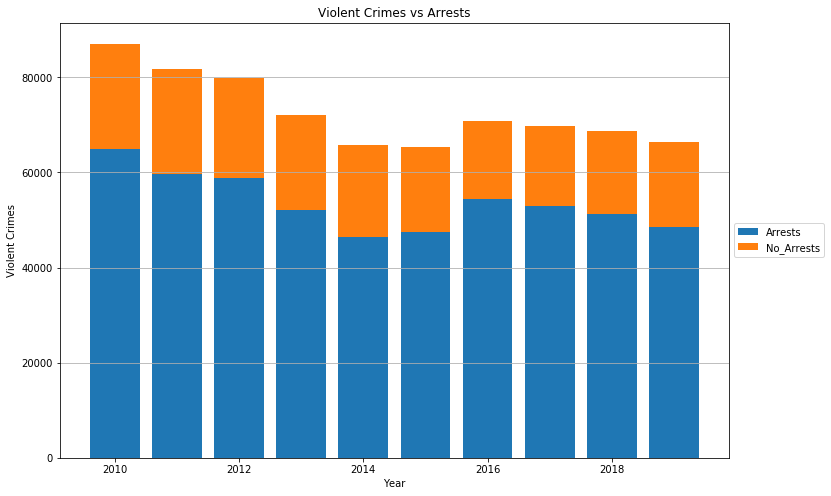

In [18]:
# Stack Bar Chart Violent Crimes vs Arrests
cumval=0
fig = plt.figure(figsize=(12,8))
for col in v_crime_arrests.columns[~v_crime_arrests.columns.isin(['Year'])]:
    plt.bar(v_crime_arrests.Year, v_crime_arrests[col], bottom=cumval, label=col)
    cumval = cumval+v_crime_arrests[col]

# Add title, labels legend & grid lines
plt.title("Violent Crimes vs Arrests")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")

# Legend Names & Relocate outside of graph
plt.legend(["Arrests",
            "No_Arrests"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='y')

# Save the Figure
plt.savefig('v_crime_arrests.png')

plt.show()

In [19]:
# Calculate areas with the highest types of crimes

area_crimes_df = crime_df.filter(['Area',
                                 'Violent',
                                 'Gun_Violence',
                                 'Weapon',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])
area_crimes_df

# GroupBy Area
area_group = area_crimes_df.groupby(['Area'])

# Calculate Violent Crimes
v_crimes = pd.DataFrame(area_group["Violent"].sum())
v_crimes
# Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(area_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(area_group["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(area_group["Vandalism"].sum())
# vandalism_crimes
# Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(area_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(area_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sex_crimes = pd.DataFrame(area_group["Sexual"].sum())
# sexual_crimes

# area_crimes_df


In [20]:
# Merge Crime Calculations
table1 = pd.merge(v_crimes, gun_crimes, on='Area')
table1

table2 = pd.merge(table1, robbery_crimes, on='Area')
table2

table3 = pd.merge(table2, vandalism_crimes, on='Area')
table3

table4 = pd.merge(table3, fraud_crimes, on='Area')
table4

table5 = pd.merge(table4, drug_crimes, on='Area')
table5

crimes_per_area = pd.merge(table5, sex_crimes, on='Area')
crimes_per_area= crimes_per_area.reset_index()
crimes_per_area.to_csv('area_crimes.csv')
# crimes_per_area

In [21]:
# Highlight Areas with the Max Amount of Crimes per Type

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [22]:
crimes_per_area.style.apply(highlight_max)

,Area,Violent,Gun_Violence,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,Central,32227,1697,6109,10566,22247,4624,1829
1,Far North Side,54681,4118,7447,27349,13793,14048,2583
2,Far Southeast Side,98273,14909,14294,40577,9305,25881,3739
3,Far Southwest Side,48212,7307,7465,21439,5640,13983,1661
4,North Side,37110,3369,7417,21076,12106,5515,1568
5,Northwest Side,38236,3616,4763,20049,6810,8706,2059
6,Southside,112137,15147,18282,43213,10841,29031,3907
7,Southwest Side,116088,16075,17193,48077,12569,39481,6992
8,West Side,190541,27263,31542,68579,19981,115699,12319


In [23]:
# Filter Community list by West Side and Central Areas

max_crime_locations = comm_df[(comm_df.City_Area == 'West Side')|
                        (comm_df.City_Area == 'Central')]
# max_crime_locations               